# My Analysis of the Data


### 1) Our first step is to import the modules and scrubbed data csv file. We can then see general info about our data.

In [133]:
#Importing in modules
import pandas as pd
import numpy as np
import Functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from Functions import remove_dupes, percent_null_df, percent_null_col, df_snapshot, find_nans, determine_dtype, make_ints, drop_cols

#Importing in the csv 
x = pd.read_csv('https://raw.githubusercontent.com/snepaul179/Real_EstateModel-onl01-dtsc-pt-052620/master/kc_re_data.csv')

#Making a copy of the dataframe for personal notebook purpose
kc_re_scrubbed_df = x.copy()

# kc_re_scrubbed_df.head()
# kc_re_scrubbed_df.info()

ImportError: cannot import name 'drop_cols'

In [62]:
# kc_re_scrubbed_df.columns

### 2) Next we want to see which columns are categorical. We call the categorical function from our Functions notebook.

In [94]:
#This returns a np.array of categorical columns. We based this on how many unique values are in each column
%run Functions.ipynb
catagorical(kc_re_scrubbed_df, value_range = (1,10))

array(['basement', 'yr_sold', 'reno', 'view', 'condition', 'floors'],
      dtype=object)

#### A quick analysis here shows the following about each categorical column. Also this reflects the decisions made with 'reno' , 'basement', and 'yr_sold' columns from kc_re_data.csv 

        1) 'basement' values are from 0-1
        2) 'yr_sold' values are in a certain year range
        3) 'reno' looks like a true/false boolean type value to answer the question: "Is it renovated?"
        4) 'view' has 0 or 1 values
        5) 'condition' ranges from 1 to 5
                - This can be checked with:
                    kc_re_scrubbed_df[kc_re_scrubbed_df['condition'] == X].info()
                        Where "X" is the condition number
        6) 'floors' range from 1, 1.5, 2, to 3

#### We also visually confirm based on the structure of the graphs of the plots, we see vertical lines for discrete values instead of a homogenous "cloud".

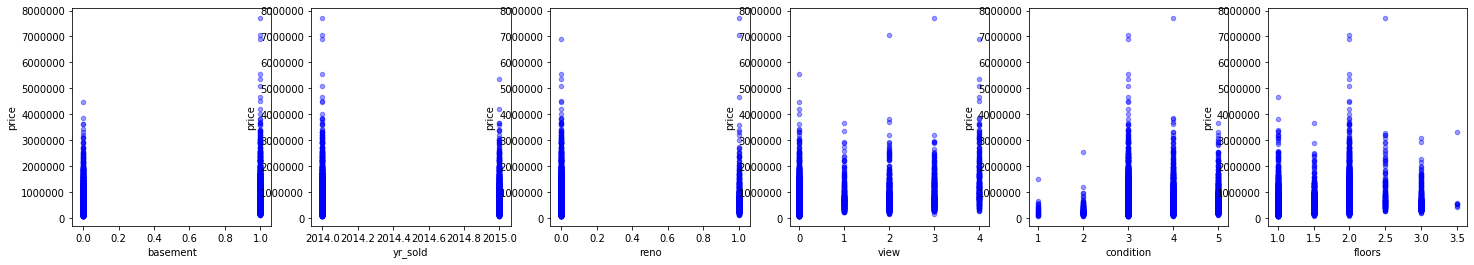

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(25,4))
for xcol, ax in zip(['basement', 'yr_sold', 'reno', 'view', 'condition', 'floors'], axes):
    kc_re_scrubbed_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### 3) Do we need to feature scale or normalize any columns?


In [129]:
#We will look at histograms for continuous variables.
#Filter out the column by datatype. Below, object-type columns are filtered out.


cat_data = kc_re_scrubbed_df.loc[:, ((kc_re_scrubbed_df.dtypes != 'object') & (kc_re_scrubbed_df.nunique() > 20))]
fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(16,40))

categoricals = [column for column in cat_data.columns if column != 'id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(kc_re_scrubbed_df[col].dropna(), bins='auto')    ax.set_title(col)
    
fig.tight_layout()

SyntaxError: invalid syntax (<ipython-input-129-2c06c21fce4d>, line 11)

##### We are omitting some of the columns because of the high number of zeros

   Omitting: 'sqft_basement', 'yr_renovated'

In [152]:
#Keeping the following columns after visual inspection above
# contiuous = ['price','yr_built', 'age_at_sale', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'zipcode']
contiuous = ['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15']
kc_re_scrubbed_df_cont = kc_re_scrubbed_df[contiuous]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E32FE984E0>,
      dtype=object)

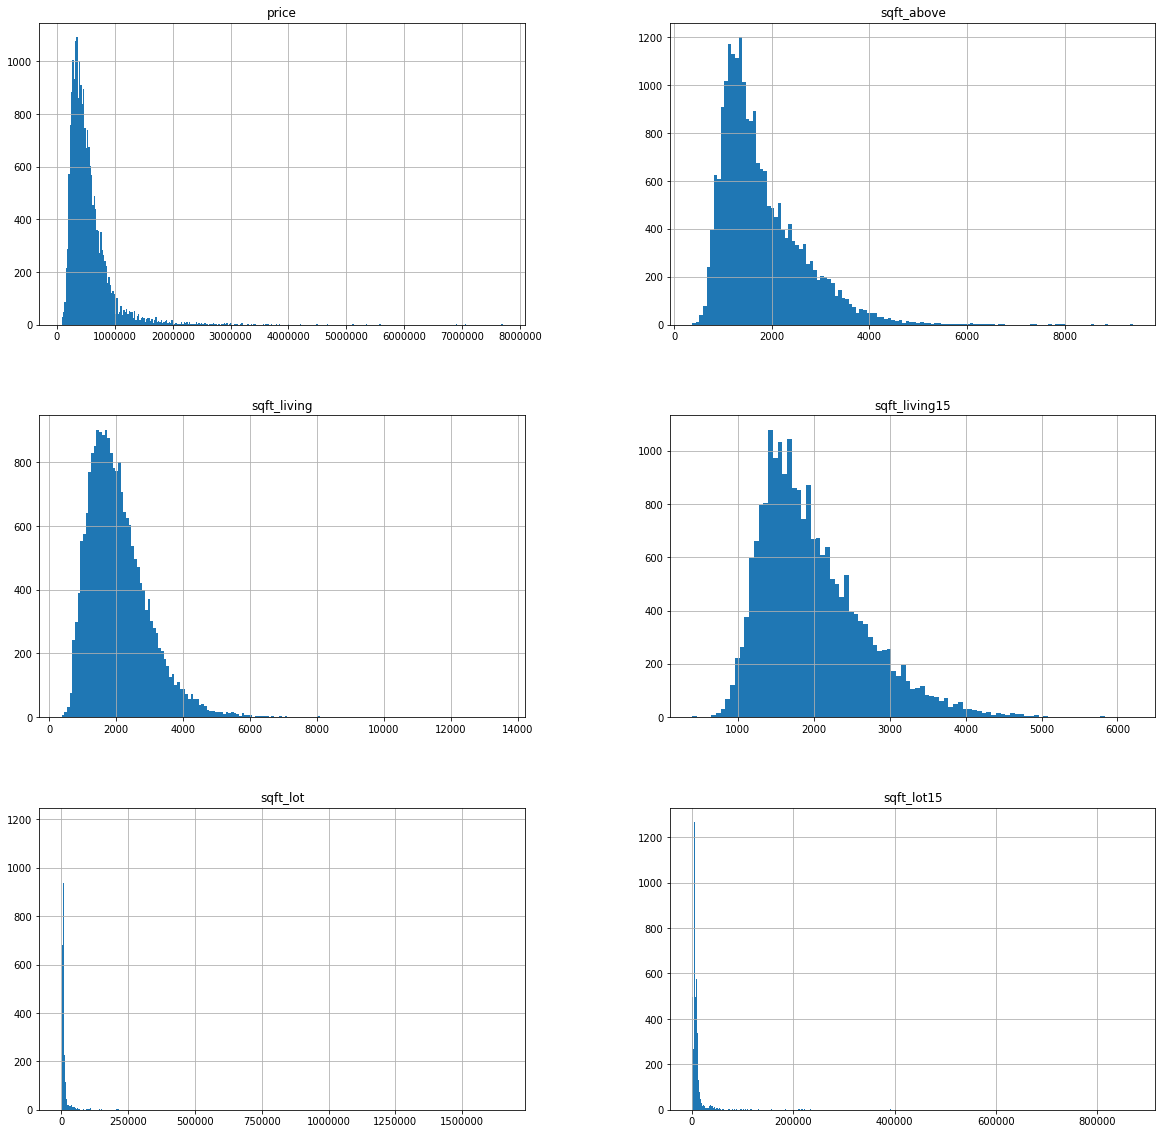

In [153]:
kc_re_scrubbed_df_cont.hist(figsize  = [20, 20], bins='auto')

### We see below that we can normalize some of the data with log normalization. After log transform, we see the graphs are much more normalized.

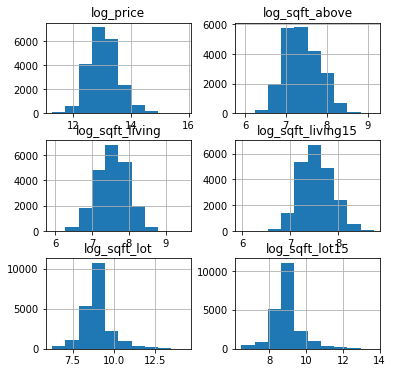

In [160]:
# We log normalize the chosen columns based upon previous cell visual inspection
# We will keep: ['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15']

data_log = pd.DataFrame([])
data_log['log_price'] = np.log(kc_re_scrubbed_df_cont['price'])
data_log['log_sqft_lot'] = np.log(kc_re_scrubbed_df_cont['sqft_lot'])
data_log['log_sqft_living'] = np.log(kc_re_scrubbed_df_cont['sqft_living'])
data_log['log_sqft_above'] = np.log(kc_re_scrubbed_df_cont['sqft_above'])
data_log['log_sqft_living15'] = np.log(kc_re_scrubbed_df_cont['sqft_living15'])
data_log['log_sqft_lot15'] = np.log(kc_re_scrubbed_df_cont['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

In [161]:
# drop_cols = ['yr_built', 'age_at_sale', 'lat', 'long', 'zipcode']
# df = kc_re_scrubbed_df_cont
# target = 'price'
# cols = df.drop(drop_cols,axis=1).columns

#predictor columns comparing price to square footage 
formula = 'price ~ sqft_lot+sqft_living+sqft_above+sqft_living15+sqft_lot15'

#### 4) Merging the final dataframe with concat

In [164]:
price = kc_re_scrubbed_df_cont['price']

log_sqft_lot = np.log(kc_re_scrubbed_df_cont['sqft_lot'])
log_sqft_living = np.log(kc_re_scrubbed_df_cont['sqft_living'])
log_sqft_above = np.log(kc_re_scrubbed_df_cont['sqft_above'])
log_sqft_living15 = np.log(kc_re_scrubbed_df_cont['sqft_living15'])
log_sqft_lot15 = np.log(kc_re_scrubbed_df_cont['sqft_lot15'])

scaled_price = (price-min(price))/(max(price)-min(price))
scaled_sqft_lot = (log_sqft_lot-np.mean(log_sqft_lot))/np.sqrt(np.var(log_sqft_lot))
scaled_sqft_living = (log_sqft_living-np.mean(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))
scaled_sqft_above= (log_sqft_above-np.mean(log_sqft_above))/np.sqrt(np.var(log_sqft_above))
scaled_sqft_living15= (log_sqft_living15-np.mean(log_sqft_living15))/np.sqrt(np.var(log_sqft_living15))
scaled_sqft_lot15= (log_sqft_lot15-np.mean(log_sqft_lot15))/np.sqrt(np.var(log_sqft_lot15))


data_fin = pd.DataFrame([])
data_fin['price'] = scaled_price
data_fin['sqft_lot'] = scaled_sqft_lot
data_fin['sqft_living'] = scaled_sqft_living
data_fin['sqft_above'] = scaled_sqft_above
data_fin['sqft_living15'] = scaled_sqft_living15
data_fin['sqft_lot15'] = scaled_sqft_lot15



# cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
# yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
# orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
price = data['price']
data_fin = pd.concat([price, data_fin], axis=1)
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 7 columns):
price            21534 non-null int64
price            21534 non-null float64
sqft_lot         21534 non-null float64
sqft_living      21534 non-null float64
sqft_above       21534 non-null float64
sqft_living15    21534 non-null float64
sqft_lot15       21534 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB


In [179]:
data_ols = pd.concat([price, scaled_sqft_lot, scaled_sqft_living, scaled_sqft_above, scaled_sqft_living15, scaled_sqft_lot15], axis = 1)
data_ols.head()
data_ols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 6 columns):
price            21534 non-null int64
sqft_lot         21534 non-null float64
sqft_living      21534 non-null float64
sqft_above       21534 non-null float64
sqft_living15    21534 non-null float64
sqft_lot15       21534 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1009.5 KB


In [181]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price ~ sqft_lot+sqft_living+sqft_above+sqft_living15+sqft_lot15'
model = ols(formula=formula, data=data_fin).fit()
model.summary()

ValueError: shapes (21534,2) and (21534,2) not aligned: 2 (dim 1) != 21534 (dim 0)